## Лабораторная работа №4

## Распознавание рукописных символов

## Цель
Реализовать классификацию черно-белых изображений рукописных цифр (28x28) по 10
категориям (от 0 до 9).

## Задачи
1. Ознакомиться с представлением графических данных
2. Ознакомиться с простейшим способом передачи графических данных нейронной сети
3. Создать модель
4.  Настроить параметры обучения
5.  Написать функцию, позволяющая загружать изображение пользователи и классифицировать его

## Выполнение работы

Набор данных MNIST уже входит в состав Keras в форме набора из четырех массивов
Numpy.

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 10s 1us/step


Здесь train_images и train_labels — это тренировочный набор, то есть данные,
необходимые для обучения. После обучения модель будет проверяться тестовым (или
контрольным) набором, test_images и test_labels. Изображения хранятся в массивах
Numpy, а метки — в массиве цифр от 0 до 9. Изображения и метки находятся в прямом
соответствии, один к одному.
Для проверки корректности загрузки достаточно сравнить тестовое изображение с его
меткой.

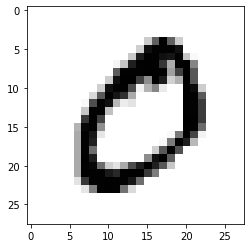

0


In [2]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1],cmap=plt.cm.binary)
plt.show()

print(train_labels[1])

Исходные изображения представлены в виде массивов чисел в интервале [0, 255]. Перед
обучением их необходимо преобразовать так, чтобы все значения оказались в интервале
[0, 1].

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Также необходимо закодировать метки категорий. В данном случае прямое кодирование
меток заключается в конструировании вектора с нулевыми элементами со значением 1 в
элементе, индекс которого соответствует индексу метки.

In [4]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Теперь можно задать базовую архитектуру сети.

In [5]:
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

Чтобы подготовить сеть к обучению, нужно настроить еще три параметра для этапа
компиляции:
1. функцию потерь, которая определяет, как сеть должна оценивать качество своей
работы на обучающих данных и, соответственно, как корректировать ее в
правильном направлении;
2. оптимизатор — механизм, с помощью которого сеть будет обновлять себя, опираясь
на наблюдаемые данные и функцию потерь;
3. метрики для мониторинга на этапах обучения и тестирования — здесь нас будет
интересовать только точность (доля правильно классифицированных
изображений).

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

Теперь можно начинать обучение сети, для чего в случае использования библиотеки Keras
достаточно вызвать метод fit сети — он пытается адаптировать (fit) модель под обучающие
данные.

In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3112 - accuracy: 0.9131
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1349 - accuracy: 0.9617
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.9736
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9798
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0526 - accuracy: 0.9844


В процессе обучения отображаются две величины: потери сети на обучающих данных и
точность сети на обучающих данных.
Теперь проверим, как модель распознает контрольный набор:

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0747 - accuracy: 0.9785
test_acc: 0.9785000085830688


## Требования

1. Найти архитектуру сети, при которой точность классификации будет не менее 95%
2. Исследовать влияние различных оптимизаторов, а также их параметров, на процесс обучения
3. Написать функцию, которая позволит загружать пользовательское изображение не из датасета

## 1 Найдем архитектуру, при которой точность классификации будет не менее 95 процентов.

In [9]:
model2 = Sequential()
model2.add(Flatten())
model2.add(Dense(100, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model2.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model2.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3800 - accuracy: 0.8959
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1765 - accuracy: 0.9495
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1303 - accuracy: 0.9620
Epoch 4/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1025 - accuracy: 0.9711
Epoch 5/5
313/313 [==============================] - 0s 933us/step - loss: 0.0994 - accuracy: 0.9693
test_acc: 0.9692999720573425


In [10]:
model3 = Sequential()
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(128, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model3.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model3.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3139 - accuracy: 0.9114
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1281 - accuracy: 0.9623
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0882 - accuracy: 0.9739
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0660 - accuracy: 0.9801
Epoch 5/5
313/313 [==============================] - 0s 965us/step - loss: 0.0820 - accuracy: 0.9739
test_acc: 0.9739000201225281


In [11]:
model4 = Sequential()
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dense(784, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model4.fit(train_images, train_labels, epochs=5, batch_size=32)

test_loss, test_acc = model4.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2168 - accuracy: 0.9337
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0945 - accuracy: 0.9701
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0670 - accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0513 - accuracy: 0.9832
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0794 - accuracy: 0.9773
test_acc: 0.9772999882698059


In [12]:
model5 = Sequential()
model5.add(Flatten())
model5.add(Dense(784, activation='relu'))
model5.add(Dense(1000, activation='relu'))
model5.add(Dense(10, activation='softmax'))

model5.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model5.fit(train_images, train_labels, epochs=5, batch_size=32)

test_loss, test_acc = model5.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1793 - accuracy: 0.9453
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0815 - accuracy: 0.9751
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0580 - accuracy: 0.9818
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0444 - accuracy: 0.9860
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.1046 - accuracy: 0.9736
test_acc: 0.9735999703407288


## Исследуем различные оптимизаторы и их параметры

In [13]:
model6 = Sequential()
model6.add(Flatten())
model6.add(Dense(256, activation='relu'))
model6.add(Dense(10, activation='softmax'))

model6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),loss='categorical_crossentropy', metrics=['accuracy'])

model6.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model6.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2089 - accuracy: 0.9360
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1096 - accuracy: 0.9671
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0857 - accuracy: 0.9745
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0780 - accuracy: 0.9769
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1482 - accuracy: 0.9715
test_acc: 0.9714999794960022


In [14]:
model7 = Sequential()
model7.add(Flatten())
model7.add(Dense(256, activation='relu'))
model7.add(Dense(10, activation='softmax'))

model7.compile(optimizer='RMSprop',loss='categorical_crossentropy', metrics=['accuracy'])

model7.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model7.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2898 - accuracy: 0.9180
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1281 - accuracy: 0.9628
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0880 - accuracy: 0.9742
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0662 - accuracy: 0.9804
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0777 - accuracy: 0.9770
test_acc: 0.9769999980926514


In [15]:
model8 = Sequential()
model8.add(Flatten())
model8.add(Dense(256, activation='relu'))
model8.add(Dense(10, activation='softmax'))

model8.compile(optimizer='SGD',loss='categorical_crossentropy', metrics=['accuracy'])

model8.fit(train_images, train_labels, epochs=5, batch_size=128)

test_loss, test_acc = model8.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.1067 - accuracy: 0.7484
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5293 - accuracy: 0.8682
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4263 - accuracy: 0.8870
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3793 - accuracy: 0.8964
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3254 - accuracy: 0.9099
test_acc: 0.9099000096321106


## Функция которая позволяет загружать пользовательские изображения

In [16]:
from PIL import Image
import numpy as np
def img(name_img):
    img_new = Image.open(name_img)
    img_new = img_new.convert('L')
    img_new = np.asarray(img_new)
    img_new = img_new / 255.0
    x = np.expand_dims(img_new, axis=0)
    res = model4.predict(x)
    print(res)
    print(f"Распознанная цифра: {np.argmax(res)}")
    plt.imshow(img_new, cmap=plt.cm.binary)
    plt.show()

1/1 [==============================] - 0s 18ms/step
[[1.4924008e-05 3.3602387e-02 6.3467227e-02 8.9983207e-01 2.7415899e-03
  1.3592410e-04 4.9161309e-07 5.1934643e-05 7.5441982e-05 7.7980832e-05]]
Распознанная цифра: 3


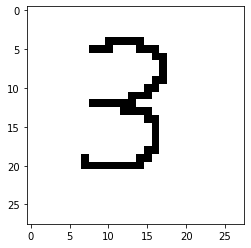

In [23]:
img('img1.png')

1/1 [==============================] - 0s 17ms/step
[[3.1650525e-05 3.7010029e-02 1.4638182e-04 1.8046210e-05 9.5575142e-01
  4.1165515e-03 2.4940125e-03 2.2037231e-05 3.9546768e-04 1.4297854e-05]]
Распознанная цифра: 4


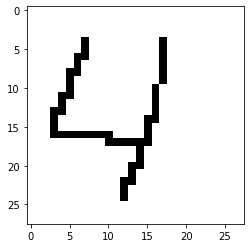

In [24]:
img('img2.png')